In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# allow plots to appear directly in the notebook
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

Advertising data set contains information about money spent on advertisement (TV, Radio and Newspaper) and their generated Sales.

In [2]:
df_advertising = pd.read_csv("advertising.csv")
df_advertising.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [3]:
# shape of the DataFrame
#df_advertising.shape
df_advertising.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

Visualize the relationship between the features and the target using scatterplots

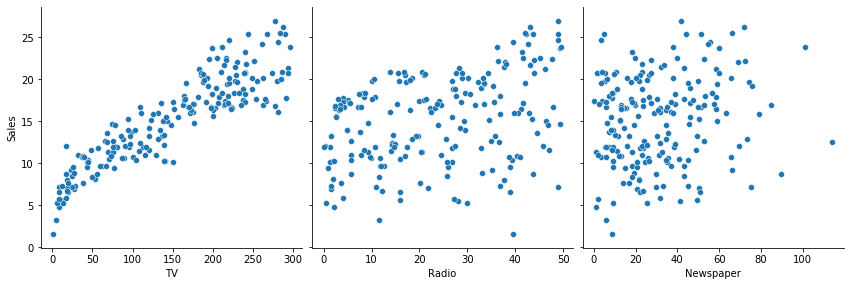

In [4]:
# visualize the relationship between the features and the target using scatterplots
sns.pairplot(df_advertising, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size = 4, aspect = 1)

In [5]:
#Let's estimate the model coefficients for the advertising data .i.e the gradient and the y-intecept

Ststsmodels_model = smf.ols(formula='Sales ~ TV', data = df_advertising)
Ststsmodels_result = Ststsmodels_model.fit()

# print the coefficients
Ststsmodels_result.params

Intercept    6.974821
TV           0.055465
dtype: float64

In [6]:
### SCIKIT-LEARN ###

X = df_advertising[['TV']]
y = df_advertising[["Sales"]]

SkLearn_model = LinearRegression()
SkLearn_result = SkLearn_model.fit(X, y)

# print the coefficients
print(SkLearn_result.intercept_)
print(SkLearn_result.coef_)

[6.97482149]
[[0.05546477]]


<h1>Model Interpretation </h1>
The Interpretation comes out as : y = 0.05546x + 6.97482149

Which means - A "unit" increase in TV ad spending is associated with a 0.05546 "unit" increase in Sales. 
Or, An additional $1,000 spent on TV ads is associated with an increase in sales of 55.46 items.

<h1>Model Prediction</h1>
For the TV advertising of $50,000. What is prediction for Sales?

We would use 50 instead of 50,000 because the original data consists of examples that are divided by 1000

In [7]:
# manually calculate the prediction
Sales = 0.05546477*50 + 6.97482149
Sales * 1000

9748.05999

In [8]:
### STATSMODELS ###

X_new = pd.DataFrame({'TV': [50]})

# predict for a new observation
Sales = Ststsmodels_result.predict(X_new)
Sales * 1000

0    9748.060012
dtype: float64

### SCIKIT-LEARN ###

# predict for a new observation
Sales = SkLearn_result.predict(np.array(50).reshape(1,-1))
Sales * 1000

<h1>Model Testing</h1>

We will compare the predicted values to the actual values.

In [9]:
df_advertising.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


TV sales prediction.

Let's use cell 4 on the TV column. The ad cost is 180.8, we expect sales to amount to <b>17.9</b>.
The SkLearn model predicts a value of <b>17.00285199</b>. Close enough.

In [10]:
# predict for a new observation
Sales = SkLearn_result.predict(np.array(180.8).reshape(1,-1))
Sales

array([[17.00285199]])

Radio sales prediction.

Let's use cell 16 on the Radio column. The ad cost is 36.6, we expect sales to amount to <b>12.5</b>.
The SkLearn model predicts a value of <b>9.00483209</b>.

In [11]:
# predict for a new observation
Sales = SkLearn_result.predict(np.array(36.6).reshape(1,-1))
Sales

array([[9.00483209]])

Newspaper sales prediction.

Let's use cell 10 on the Newspaper column. The ad cost is 24.2, we expect sales to amount to <b>12.6</b>.
The SkLearn model predicts a value of <b>8.31706893</b>.

In [12]:
# predict for a new observation
Sales = SkLearn_result.predict(np.array(24.2).reshape(1,-1))
Sales

array([[8.31706893]])